### Empirical Example Three for RobustiPy!

#### This example is designed to show how the OLSRobust class can be used to estimate a model with longitudinal data.

To get access to this data, you'll need the Understanding Society: Longitudinal Teaching Dataset, Waves 1-9, 2009-2018 from [[here](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=8715#!/access-data)]. Registration is immediate for this. Documentation which accompanies it can be found [[here](https://doc.ukdataservice.ac.uk/doc/8715/mrdoc/pdf/8715_user_guide.pdf)].

You want to put this data somewhere like `.data/input`.

As always, lets load in some of the libraries which we'll need:

In [1]:
import os
import numpy as np
import pandas as pd
from robustipy.models import OLSRobust

Then, load in the dataset (note: we are using the tab-seperated version, but they should all be equivilent):

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(),
                              'data',
                              'input',
                              'longitudinal_td.tab'), sep='\t',
                 low_memory=False)

Let's quickly eyeball the data to see what we have:

In [3]:
df.head(5)

,pidp,wave,hidp,buno_dv,intdatd_dv,intdatm_dv,intdaty_dv,indmode,numintd_dv,hhorig,...,envhabit2,envhabit3,envhabit4,envhabit5,envhabit6,envhabit7,envhabit8,envhabit9,envhabit10,envhabit11
0,68001367,1,68001363,1,19,1,2009,1,1,1,...,2,4,4,4,3,3,3,1,5,1
1,68004087,1,68004083,1,8,1,2009,1,9,1,...,1,5,1,3,2,1,5,3,4,6
2,68004087,2,68013602,1,16,2,2010,1,9,1,...,,,,,,,,,,
3,68004087,3,68013604,1,9,2,2011,1,9,1,...,,,,,,,,,,
4,68004087,4,68013606,1,24,1,2012,1,9,1,...,1,5,1,5,3,1,6,2,5,6


Our main dependent variable of interest is sf1_dv: General health.

In [4]:
df['sf1_dv'] = pd.to_numeric(df['sf1_dv'], errors='coerce')

Then, we're going to binarise it so that good health is 3 or more (==1), zero otherwise:

In [5]:
df = df[df['sf1_dv']>0]
df['sf1_dv_good'] = np.where(df['sf1_dv']>=3, 1, 0)

Our grouping variable needs to be a string

In [6]:
df['pidp'] = df['pidp'].astype(str)

Let's convert our `sex_dv` variable into binary 1s and zeros:

<Axes: >

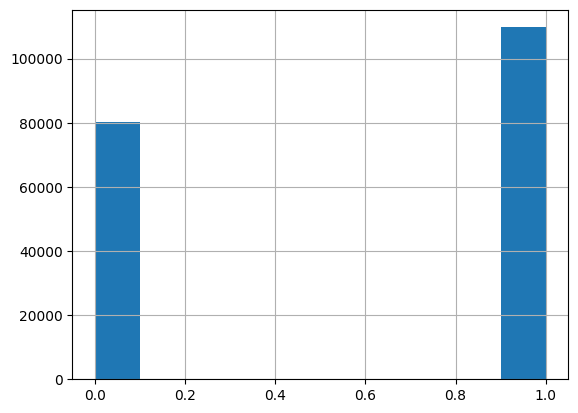

In [7]:
df['sex_dv'] = pd.to_numeric(df['sex_dv'], errors='coerce')
df['sex_dv'] = np.where(df['sex_dv']==2, 1, 0)
df['sex_dv'].hist()

Let's do something similar for cohab_dv, but this is already 1s and 0s:

In [8]:
df['cohab_dv'] = pd.to_numeric(df['cohab_dv'], errors='coerce')
df = df[df['cohab_dv']>=0]

<Axes: >

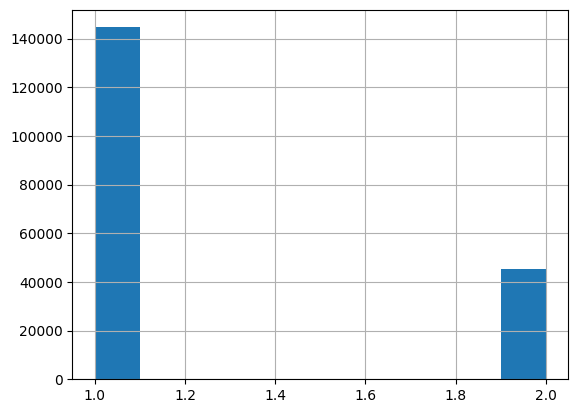

In [9]:
df['urban_dv'] = pd.to_numeric(df['urban_dv'], errors='coerce')
df = df[df['urban_dv']>0]
df['urban_dv'].hist()

Lets then – for simplicity and without failing to appreciate the complexity of this variable – dichotomize an additional variable (after cleaning it for missing/non-response). You can make something as simple as `is_british` (==1, 0 otherwise), or something more elaborate.

In [11]:
df['ethn_dv'] = pd.to_numeric(df['ethn_dv'], errors='coerce')
df = df[df['ethn_dv']>0]
df['is_british'] = np.where(df['ethn_dv']==1, 1, 0)

In [12]:
df['bmi_dv'] = pd.to_numeric(df['bmi_dv'], errors='coerce')
df = df[df['bmi_dv']>0]

In [13]:
df = df[df['hhsize_dv']>0]

In [14]:
df['age_dv'] = pd.to_numeric(df['age_dv'], errors='coerce')
df = df[df['age_dv']>0]

Let's next make a variable for whether an individual has a degree or not:

In [15]:
df['hiqual_dv'] = pd.to_numeric(df['hiqual_dv'], errors='coerce')
df = df[df['hiqual_dv']>0]
df['has_degree'] = np.where(df['hiqual_dv']==3, 1, 0)

Subset our dataframe for simplicity:

In [27]:
df = df.reset_index()
df = df[['sf1_dv_good', 'age_dv', 'sex_dv', 'cohab_dv', 'pidp', 'is_british', 'urban_dv', 'hhsize_dv', 'bmi_dv']]
df.head(5)

,sf1_dv_good,age_dv,sex_dv,cohab_dv,pidp,is_british,urban_dv,hhsize_dv,bmi_dv
0,0,39,0,0,68001367,1,1.0,1,29.6
1,0,59,0,0,68004087,0,1.0,1,21.6
2,1,39,1,1,68006127,1,1.0,4,38.8
3,1,72,1,0,68006807,1,1.0,1,21.0
4,0,57,1,0,68007487,1,1.0,4,28.5


What's the length?

In [17]:
len(df)

34216

Now let's drop and see if we lose any (we shouldnt, though! Why?)

In [18]:
df = df.dropna()
print(len(df))

34216


Now what does our dataset look like?

In [19]:
df.head(5)

,sf1_dv_good,age_dv,sex_dv,cohab_dv,pidp,gor_dv,is_british,urban_dv,hhsize_dv,bmi_dv
0,0,39,0,0,68001367,1,1,1.0,1,29.6
1,0,59,0,0,68004087,1,0,1.0,1,21.6
2,1,39,1,1,68006127,1,1,1.0,4,38.8
3,1,72,1,0,68006807,1,1,1.0,1,21.0
4,0,57,1,0,68007487,1,1,1.0,4,28.5


Lets quickly check the correlation matrix to check that nothing funky is going on:

In [28]:
df.corr()

,sf1_dv_good,age_dv,sex_dv,cohab_dv,pidp,is_british,urban_dv,hhsize_dv,bmi_dv
sf1_dv_good,1.000000,0.208857,-0.001340,-0.028493,-0.009716,0.042586,-0.017272,-0.099008,0.180794
age_dv,0.208857,1.000000,-0.018694,-0.203942,-0.001113,0.265100,0.142413,-0.433151,0.153511
sex_dv,-0.001340,-0.018694,1.000000,-0.015784,-0.008592,0.019619,0.014312,0.014180,-0.061605
cohab_dv,-0.028493,-0.203942,-0.015784,1.000000,-0.009613,0.067315,-0.018154,0.046831,-0.019135
pidp,-0.009716,-0.001113,-0.008592,-0.009613,1.000000,-0.041107,-0.027632,0.013653,0.001454
is_british,0.042586,0.265100,0.019619,0.067315,-0.041107,1.000000,0.206949,-0.218773,0.070843
urban_dv,-0.017272,0.142413,0.014312,-0.018154,-0.027632,0.206949,1.000000,-0.049106,0.011159
hhsize_dv,-0.099008,-0.433151,0.014180,0.046831,0.013653,-0.218773,-0.049106,1.000000,-0.042932
bmi_dv,0.180794,0.153511,-0.061605,-0.019135,0.001454,0.070843,0.011159,-0.042932,1.000000


What data types do we have here?

In [29]:
df.dtypes

sf1_dv_good      int64
age_dv           int64
sex_dv           int64
cohab_dv         int64
pidp            object
is_british       int64
urban_dv       float64
hhsize_dv        int64
bmi_dv         float64
dtype: object

In [46]:
df = df[0:500]

Finally, lets call RobustiPy as we do in other examples, noting the group='pipd' call:

In [47]:
ukhls_robustipy = OLSRobust(y=['age_dv'],
                            x=['sex_dv'],
                            data=df.dropna())

Now, let's fit the model:

In [48]:
ukhls_robustipy.fit(controls=['cohab_dv',
#                              'sex_dv',
#                              'is_british',
#                              'urban_dv',
#                              'hhsize_dv',
#                              'bmi_dv',
                             ],
                   draws=10,
                   kfold=10,
                   group='pidp'
                   )

Output()

ValueError: Inputs must not be empty.

And, get the results:

In [ ]:
#ukhls_results = ukhls_robustipy.get_results()

In [ ]:
#ukhls_results.summary_df

Plot results:

In [ ]:
#ukhls_results.plot(figsize=(16, 12))

And print the summary statistic:

In [ ]:
#ukhls_results.summary()